Import libraries

In [1]:
library(tidyverse)
library(forecast)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Read data

In [2]:
# Read data
madrid = read_csv("datasets/csvs_per_year/madrid_2001.csv", show_col_types = FALSE)
for (i in 2002:2018){
    url = paste("datasets/csvs_per_year/madrid_", i, ".csv", sep='')
    madrid = bind_rows(madrid, read_csv(url, show_col_types = FALSE))  
}

# Format date type
madrid$date <- as.POSIXct(madrid$date, format = "%Y-%m-%d %H:%M:%S")
madrid$Date <- as.POSIXct(format(madrid$date, "%Y-%m-%d"), format = "%Y-%m-%d")
madrid$day <- format(madrid$date, "%d")
madrid$month <- format(madrid$date, "%m")
madrid$year <- format(madrid$date, "%Y")

madrid = madrid %>%
  select(date, Date, year, month, day, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL)

### Monthly Moving Average of Madrid's Air Quality

We sum up 4 polutants (mentioned before) as a total polutions in Madrid and make an average each month.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, 

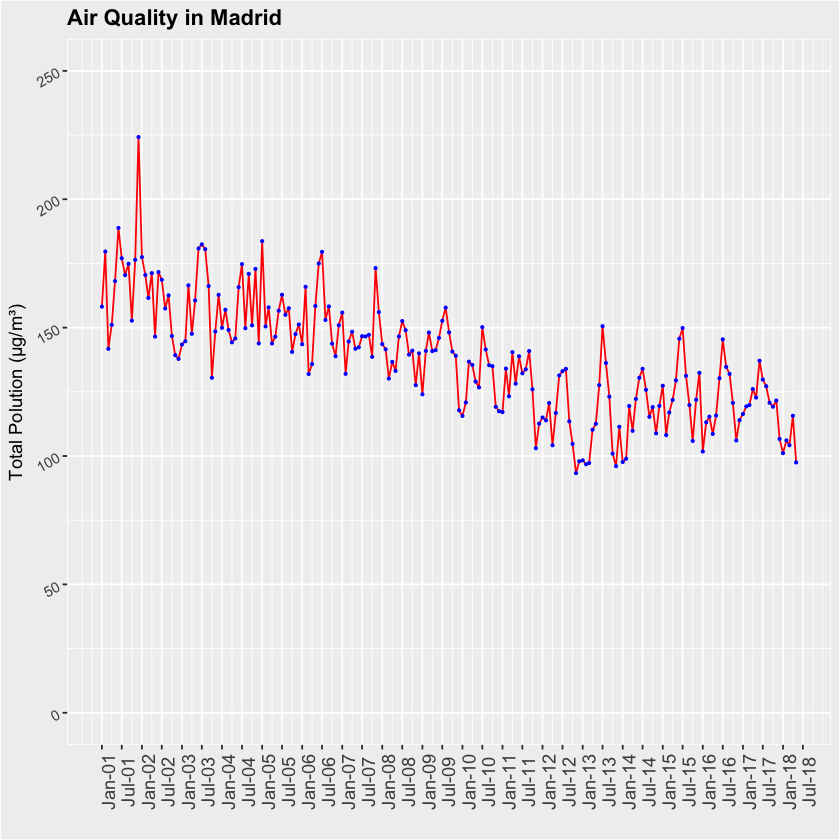

In [3]:
madrid_mean_monthly <- madrid %>%
  group_by(year, month) %>%
  summarise(across(
        .cols = where(is.numeric), 
        .fns = list(Mean = mean), na.rm = TRUE, 
        .names = "{col}"
        )) %>%
  mutate(time = paste(year, "-", month, "- 01"))

madrid_mean_monthly$tot <- rowSums(madrid_mean_monthly[,3:12], na.rm = TRUE)

madrid_mean_monthly$time <- as.Date(madrid_mean_monthly$time, format = "%Y - %m - %d")

ggplot(madrid_mean_monthly, aes(x = time, y = tot)) + geom_line(color = 'red') + 
  geom_point(aes(x = time, y = tot), size = 0.5, color = 'blue') +
  theme(axis.text.x = element_text(angle = 90),
        legend.position = "none",
        panel.background = element_rect(fill = "gray94", colour = "white",
                                        size = 0.5, linetype = "solid"),
        legend.background = element_rect(fill = "gray94"),
        plot.background = element_rect(fill = "gray94"),
        panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
        panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),  
        plot.title = element_text(hjust = 0, face = 'bold',color = 'black')) +
  labs(x = '', y = 'Total Polution (μg/m³)', title='Air Quality in Madrid') +
  theme(axis.text.y =element_text(angle = 30),axis.text.x=element_text(size=11)) +
  scale_x_date(breaks = seq(as.Date("2001-01-01"), as.Date("2018-07-01"), by="6 months"), date_labels = "%b-%y") + 
  scale_y_continuous(breaks = seq(0,250,50), lim = c(0,250))

### Yearly Moving Average of Madrid's Air Quality

We sum up 10 polutants (mentioned before) as a total polutions in Madrid and make an average each year.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'm

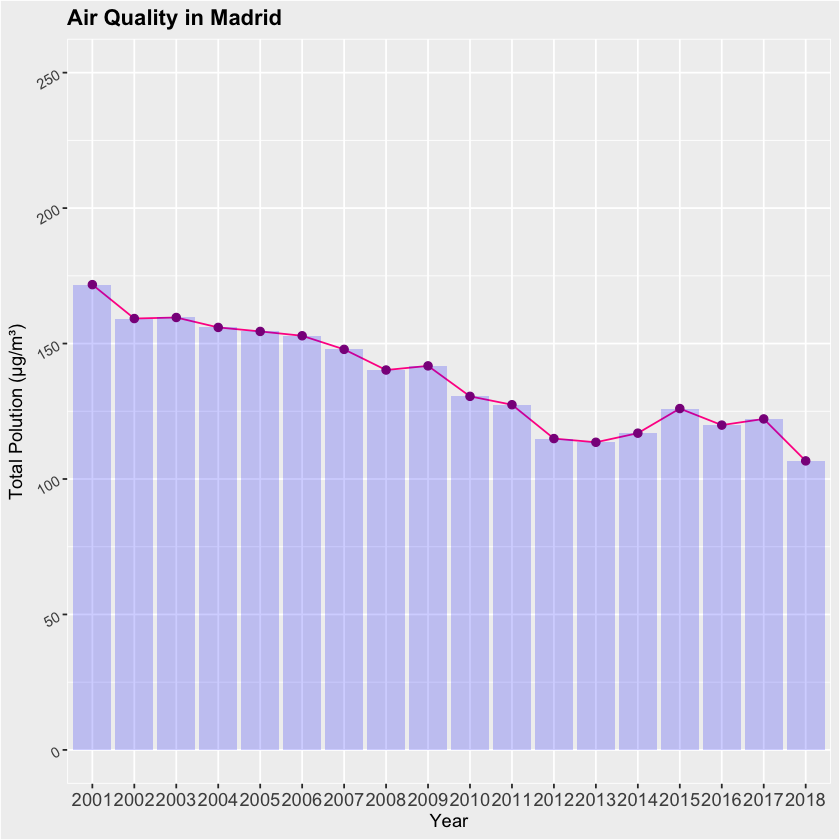

In [4]:
madrid_mean_yearly  <- madrid %>%
  group_by(year) %>%
  summarise(across(
        .cols = where(is.numeric), 
        .fns = list(Mean = mean), na.rm = TRUE, 
        .names = "{col}"
        ))

madrid_mean_yearly$tot <- rowSums(madrid_mean_yearly[,2:11], na.rm = TRUE)

ggplot(madrid_mean_yearly, aes(x = year, y = tot, group = 1)) + geom_line(color = 'deeppink') + 
  geom_col(aes(x = year, y = tot), size = 2, fill = 'blue', alpha = 0.2) +
  geom_point(aes(x = year, y = tot), size = 2, color = 'darkmagenta') +
  theme(legend.position = "none",
        panel.background = element_rect(fill = "gray94", colour = "white",
                                        size = 0.5, linetype = "solid"),
        legend.background = element_rect(fill = "gray94"),
        plot.background = element_rect(fill = "gray94"),
        panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
        panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),  
        plot.title = element_text(hjust = 0, face = 'bold',color = 'black')) +
  labs(x = 'Year', y = 'Total Polution (μg/m³)', title='Air Quality in Madrid') +
  theme(axis.text.y =element_text(angle = 30),axis.text.x=element_text(size=11)) +
  scale_y_continuous(breaks = seq(0,250,50), lim = c(0,250))

## Investigate the Increasing Behavior of Air Quality

The idea is averaging polutions each month in every year. From this condition, we will know in which month the polutions increase.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'm

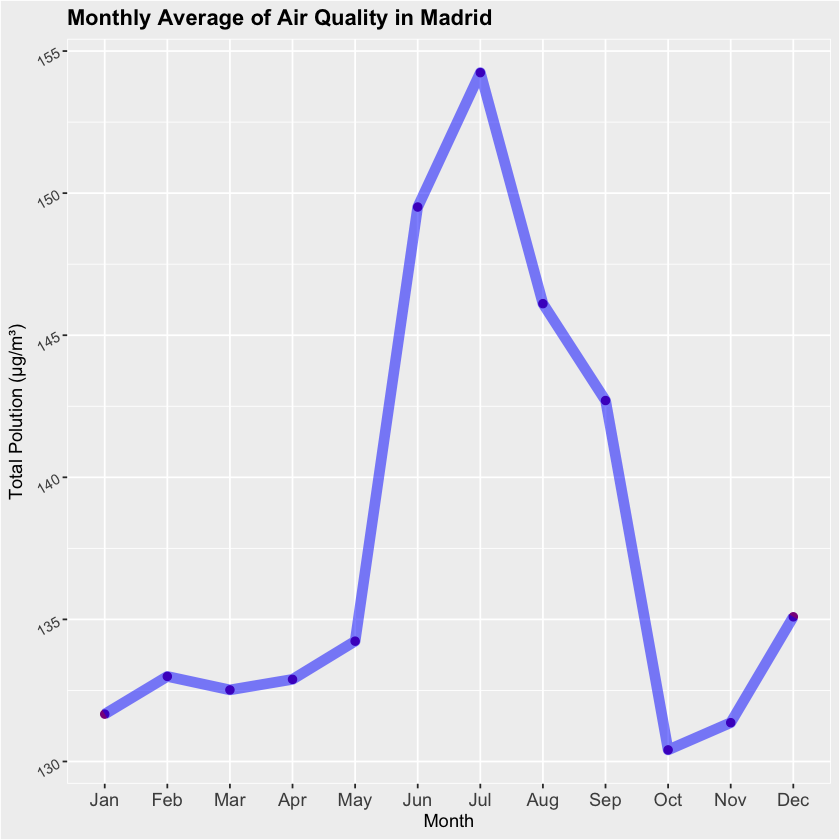

In [5]:
bulan <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

madrid_mean_monthly %>%
  group_by(month) %>%
  summarise(huy=mean(tot)) %>%
  ggplot(aes(x=month, y= huy, group=1)) + 
  geom_point(aes(x = month, y = huy), size = 2, color = 'darkmagenta') + 
  geom_line(size = 3, alpha = 0.5, color = 'blue') +
  scale_x_discrete(labels=bulan) +
    theme(legend.position = "none",
        panel.background = element_rect(fill = "gray94", colour = "white",
                                        size = 0.5, linetype = "solid"),
        legend.background = element_rect(fill = "gray94"),
        plot.background = element_rect(fill = "gray94"),
        panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
        panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),  
        plot.title = element_text(hjust = 0, face = 'bold',color = 'black')) +
  labs(x = 'Month', y = 'Total Polution (μg/m³)', title='Monthly Average of Air Quality in Madrid') +
  theme(axis.text.y =element_text(angle = 30),axis.text.x=element_text(size=11)) 

From this graph, we know that air quality is getting worse in summer (June, July, and August). Maybe there are a lot of outdoor activity in Madrid in this season.

## Forecast the Air Quality using ARIMA model

In [6]:
monthly_ts <- ts(madrid_mean_monthly[,14], start = c(2001,1), end = c(2008, 12), frequency = 12)

# Fit an automatic ARIMA model
fit_ts <- auto.arima(monthly_ts)

# Summarize the model
summary(fit_ts)

Series: monthly_ts 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2666  -0.9170
s.e.  0.1102   0.0421

sigma^2 estimated as 205.3:  log likelihood=-387.38
AIC=780.75   AICc=781.02   BIC=788.41

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -1.897029 14.10252 10.91875 -1.959755 7.020746 0.7108083
                    ACF1
Training set -0.03058294

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'm

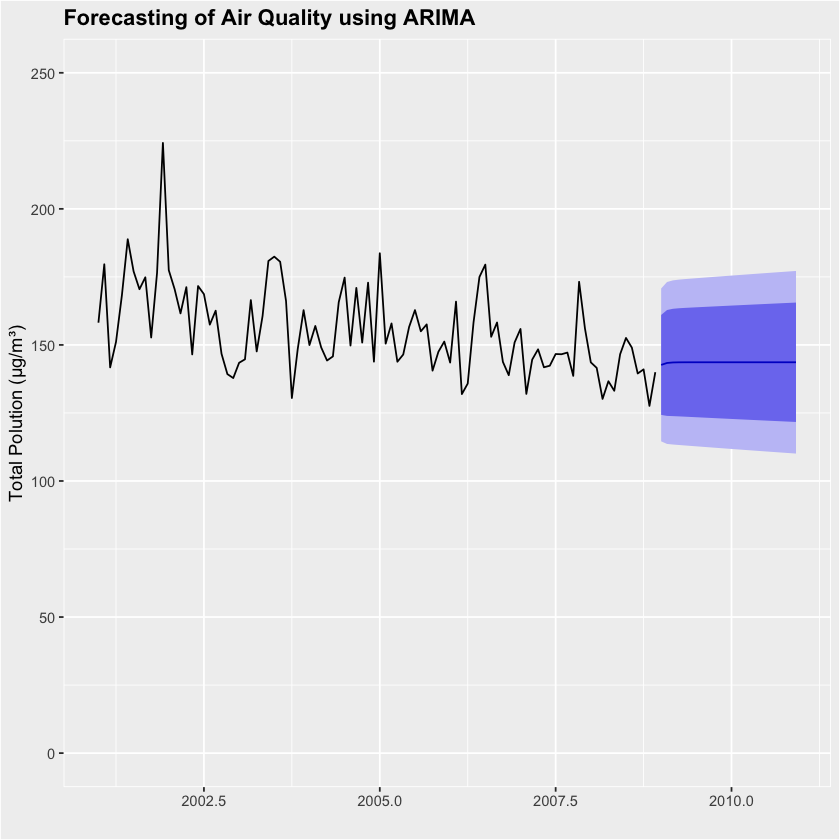

In [7]:
fit_ts %>%
  forecast(h=24) %>%
  autoplot() + 
  theme(axis.text.x = element_text(angle = 0),
        panel.background = element_rect(fill = "gray94", colour = "white",
                                        size = 0.5, linetype = "solid"),
        legend.background = element_rect(fill = "gray94"),
        plot.background = element_rect(fill = "gray94"),
        panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
        panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),  
        plot.title = element_text(hjust = 0, face = 'bold',color = 'black')) +
  labs(x = '', y = 'Total Polution (μg/m³)', title='Forecasting of Air Quality using ARIMA') +
  scale_y_continuous(breaks = seq(0,250,50), lim = c(0,250))

In [8]:
monthly_ts <- ts(madrid_mean_monthly[,14], start = c(2001,1), end = c(2018, 5), frequency = 12)

# Fit an automatic ARIMA model
fit_ts <- auto.arima(monthly_ts)

# Summarize the model
summary(fit_ts)

Series: monthly_ts 
ARIMA(4,1,1)(2,0,1)[12] 

Coefficients:
         ar1     ar2      ar3     ar4      ma1    sar1    sar2     sma1
      0.3404  0.0848  -0.0859  0.0449  -0.9199  0.4458  0.3425  -0.4266
s.e.  0.0912  0.0799   0.0820  0.0824   0.0492  0.2861  0.1144   0.3367

sigma^2 estimated as 133.7:  log likelihood=-803.61
AIC=1625.23   AICc=1626.14   BIC=1655.27

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.6214818 11.31028 8.614283 -1.014947 6.333148 0.6786408
                    ACF1
Training set 0.000296337

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Total Polution (μg/m³)' in 'm

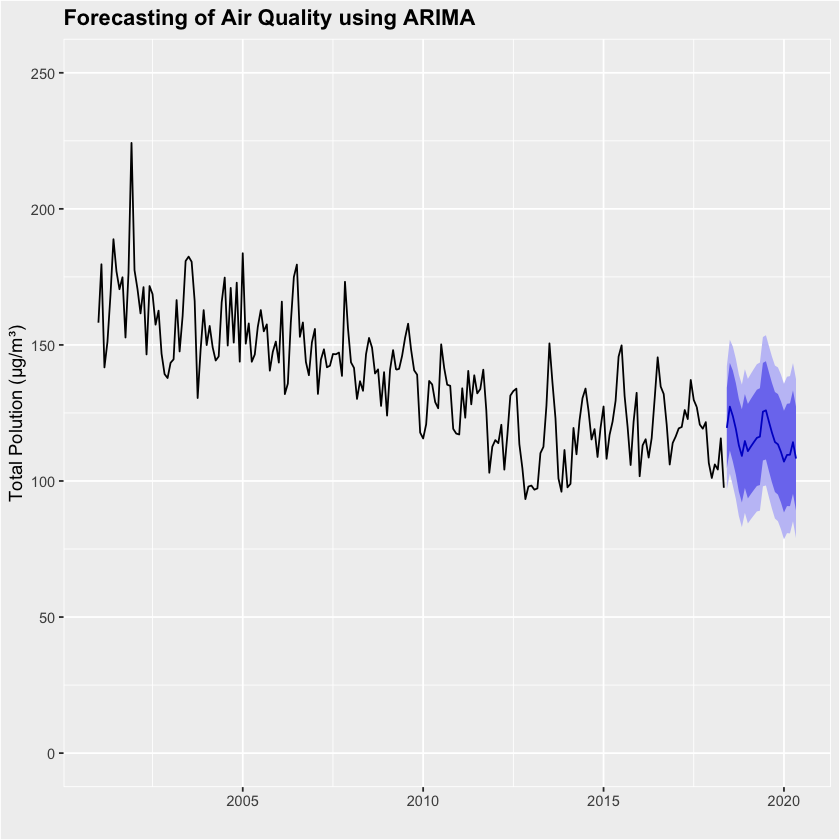

In [9]:
fit_ts %>%
  forecast(h=24) %>%
  autoplot() + 
  theme(axis.text.x = element_text(angle = 0),
        panel.background = element_rect(fill = "gray94", colour = "white",
                                        size = 0.5, linetype = "solid"),
        legend.background = element_rect(fill = "gray94"),
        plot.background = element_rect(fill = "gray94"),
        panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
        panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),  
        plot.title = element_text(hjust = 0, face = 'bold',color = 'black')) +
  labs(x = '', y = 'Total Polution (μg/m³)', title='Forecasting of Air Quality using ARIMA') +
  scale_y_continuous(breaks = seq(0,250,50), lim = c(0,250))